In [47]:
import sqlalchemy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import matplotlib.ticker as ticker 
from sklearn.cluster import KMeans
from datetime import datetime
from pytz import timezone
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [48]:
data = pd.read_csv('/app/knight/Test_knight.csv')

print(data)

     Sensitivity  Hability  Strength   Power  Agility  Dexterity  Awareness  \
0         11.420     20.38     77.58   386.1  0.14250    0.28390    0.24140   
1         18.250     19.98    119.60  1040.0  0.09463    0.10900    0.11270   
2         14.680     20.13     94.74   684.5  0.09867    0.07200    0.07395   
3         13.540     14.36     87.46   566.3  0.09779    0.08129    0.06664   
4         15.340     14.26    102.50   704.4  0.10730    0.21350    0.20770   
..           ...       ...       ...     ...      ...        ...        ...   
166        9.423     27.88     59.26   271.3  0.08123    0.04971    0.00000   
167       14.590     22.68     96.39   657.1  0.08473    0.13300    0.10290   
168       20.920     25.09    143.00  1347.0  0.10990    0.22360    0.31740   
169       16.600     28.08    108.30   858.1  0.08455    0.10230    0.09251   
170        7.760     24.54     47.92   181.0  0.05263    0.04362    0.00000   

     Prescience  Reactivity  Midi-chlorien  ...  Re

In [49]:
data = data.replace({'knight': 'Jedi'}, 1)
data = data.replace({'knight': 'Sith'}, 0)

sumVar = data.var().sum()
var = data.var()

print(var)
print(sumVar)

Sensitivity          14.132881
Hability             21.251915
Strength            675.999600
Power            145277.392861
Agility               0.000229
Dexterity             0.003237
Awareness             0.006648
Prescience            0.001717
Reactivity            0.000859
Midi-chlorien         0.000064
Slash                 0.065219
Push                  0.308469
Pull                  3.369613
Lightsaber         1620.559298
Survival              0.000010
Repulse               0.000424
Friendship            0.000675
Blocking              0.000037
Deflection            0.000100
Mass                  0.000008
Recovery             27.475459
Evade                42.326589
Stims              1318.103509
Sprint           408283.903926
Combo                 0.000517
Delay                 0.022674
Attunement            0.036849
Empowered             0.004436
Burst                 0.004971
Grasping              0.000293
dtype: float64
557284.9730849315


In [50]:
object= StandardScaler()

data = object.fit_transform(data)
pca = PCA(0.99)
pc = pca.fit_transform(data)

print(pca.explained_variance_ratio_)

[0.45325397 0.20918077 0.08988223 0.06354561 0.0540255  0.04104506
 0.01970586 0.01248169 0.0099581  0.00864213 0.00842696 0.0070612
 0.00613493 0.00460575 0.00259258]


In [51]:
# Calculate the cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

In [52]:
# Determine the number of components to keep for 85% variance explained
n_components = np.argmax(cumulative_variance_ratio >= 0.99) + 1

In [53]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(data)
X_test_pca = pca.transform(data)
print(n_components)

15


In [54]:
print(cumulative_variance_ratio)

cumulative_variance_ratio = cumulative_variance_ratio * 100

[0.45325397 0.66243475 0.75231697 0.81586258 0.86988808 0.91093313
 0.93063899 0.94312068 0.95307878 0.9617209  0.97014786 0.97720906
 0.98334399 0.98794974 0.99054232]


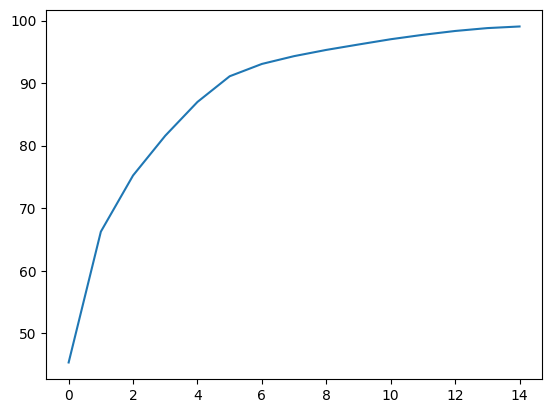

In [55]:
plt.plot(range(len(cumulative_variance_ratio)), cumulative_variance_ratio)

plt.show()